# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [12]:
import requests
import json

cotacao = requests.get("https://economia.awesomeapi.com.br/json/all")
cotacao_dic = cotacao.json()

print(cotacao_dic.keys())

dict_keys(['USD', 'USDT', 'CAD', 'GBP', 'ARS', 'BTC', 'LTC', 'EUR', 'JPY', 'CHF', 'AUD', 'CNY', 'ILS', 'ETH', 'XRP', 'DOGE'])


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [14]:
print(f"Dólar: {cotacao_dic["USD"]["bid"]}")
print(f"Euro: {cotacao_dic["EUR"]["bid"]}")
print(f"BitCoin: {cotacao_dic["BTC"]["bid"]}")

Dólar: 5.7295
Euro: 6.0137
BitCoin: 550487


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [36]:
cotacao_dolar30d = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30")
cotacao_dolar30d_dict = cotacao_dolar30d.json()

lista_dolar30d = [float(dia["bid"]) for dia in cotacao_dolar30d_dict]

print(lista_dolar30d)

[5.7295, 5.732, 5.7295, 5.69757, 5.7206, 5.6882, 5.713, 5.695, 5.7042, 5.7669, 5.7649, 5.7654, 5.7874, 5.807, 5.8058, 5.7617, 5.8039, 5.7581, 5.8066, 5.8435, 5.843, 5.841, 5.8747, 5.8563, 5.8571, 5.8926, 5.912, 5.9109, 5.9243, 5.9395]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [54]:
cotacao_btc10meses = requests.get("https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20200101&end_date=20201031")
cotacao_btc10meses_dict = cotacao_btc10meses.json()

lista_btc10meses = [float(dia["bid"]) for dia in cotacao_btc10meses_dict]
lista_btc10meses.reverse()

print(len(lista_btc10meses))
print(lista_btc10meses)



200
[35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48800.4, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800

#### Gráfico com as cotações do BitCoin

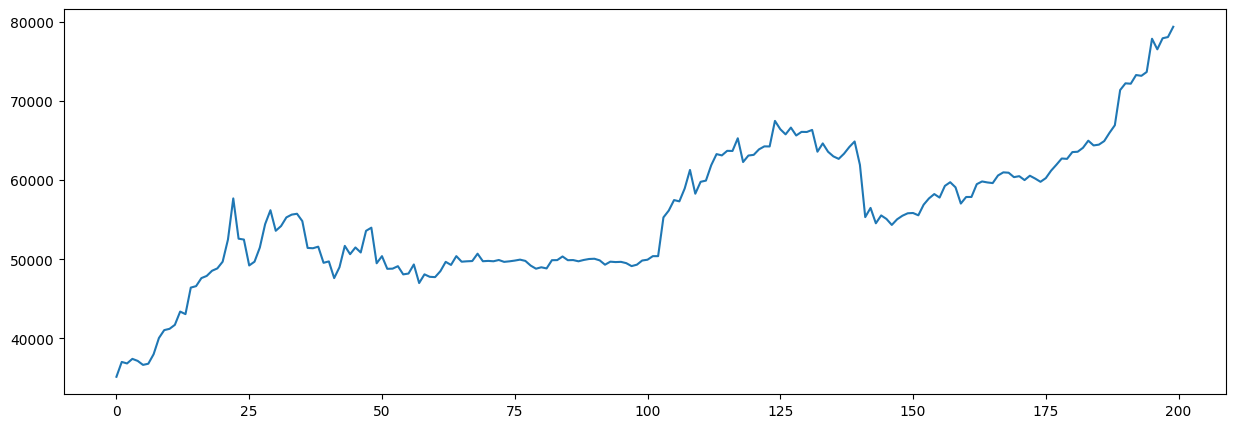

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_btc10meses)
plt.show()